In [1]:
import numpy as np
import re
import matplotlib.pyplot as plt


In [2]:
text = """We are about to study the idea of a computational process.
Computational processes are abstract beings that inhabit computers.
As they evolve, processes manipulate other abstract things called data.
The evolution of a process is directed by a pattern of rules called a program.
People create programs to direct processes. In effect, we conjure the spirits
of the computer with our spells."""

text = re.sub('[^A-Za-z ]+', ' ', text).lower()
words = text.split()

print("Total words:", len(words))
print("First 20 words:", words[:20])


Total words: 62
First 20 words: ['we', 'are', 'about', 'to', 'study', 'the', 'idea', 'of', 'a', 'computational', 'process', 'computational', 'processes', 'are', 'abstract', 'beings', 'that', 'inhabit', 'computers', 'as']


In [3]:
# Create vocabulary
vocab = sorted(set(words))
vocab_size = len(vocab)
print("Vocabulary size:", vocab_size)

word_to_idx = {w: i for i, w in enumerate(vocab)}
idx_to_word = {i: w for i, w in enumerate(vocab)}

window = 2

# Generate training data (context, target)
data = []
for i in range(window, len(words) - window):
    context = [words[i - 2], words[i - 1], words[i + 1], words[i + 2]]
    target = words[i]
    data.append((context, target))

print("Sample training pair:")
print(data[0:5])


Vocabulary size: 44
Sample training pair:
[(['we', 'are', 'to', 'study'], 'about'), (['are', 'about', 'study', 'the'], 'to'), (['about', 'to', 'the', 'idea'], 'study'), (['to', 'study', 'idea', 'of'], 'the'), (['study', 'the', 'of', 'a'], 'idea')]


In [4]:
embed_dim = 10  

# Random initialization of weights
W1 = np.random.uniform(-1, 1, (vocab_size, embed_dim))    # Input → Hidden
W2 = np.random.uniform(-1, 1, (embed_dim, vocab_size))    # Hidden → Output


In [5]:
def one_hot(idx):
    vec = np.zeros(vocab_size)
    vec[idx] = 1
    return vec

def softmax(x):
    exp_x = np.exp(x - np.max(x)) 
    return exp_x / np.sum(exp_x)


In [6]:
def forward(context_idxs):
    h = np.mean(W1[context_idxs], axis=0) 
    
    u = np.dot(h, W2)
    y_pred = softmax(u)
    return h, y_pred


def backward(context_idxs, h, y_pred, target_idx, lr=0.03):
    global W1, W2
    e = y_pred - one_hot(target_idx)
    
    dW2 = np.outer(h, e)
    W2 -= lr * dW2
    
    dW1 = np.dot(W2, e)
    for i in context_idxs:
        W1[i] -= lr * dW1 / len(context_idxs)


Epoch 0 | Loss: 3.9840
Epoch 10 | Loss: 3.5004
Epoch 20 | Loss: 3.0533
Epoch 30 | Loss: 2.5905
Epoch 40 | Loss: 2.1720
Epoch 50 | Loss: 1.8123
Epoch 60 | Loss: 1.4959
Epoch 70 | Loss: 1.2206
Epoch 80 | Loss: 0.9873
Epoch 90 | Loss: 0.7949


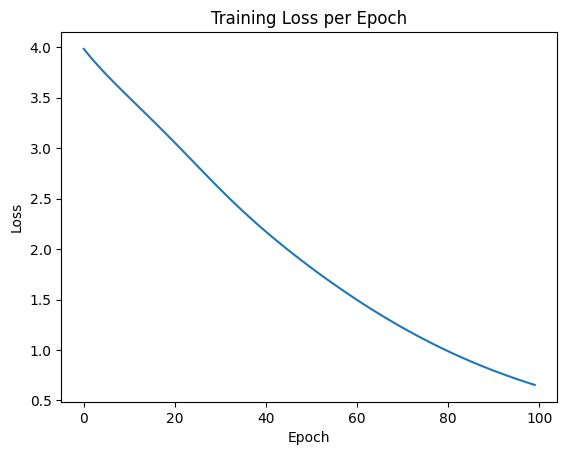

In [7]:
epochs = 100
losses = []

for epoch in range(epochs):
    total_loss = 0
    for context, target in data:
        context_idxs = [word_to_idx[w] for w in context]
        target_idx = word_to_idx[target]
        
        # Forward
        h, y_pred = forward(context_idxs)
        
        loss = -np.log(y_pred[target_idx] + 1e-9)
        total_loss += loss
        
        # Backward
        backward(context_idxs, h, y_pred, target_idx)
    
    avg_loss = total_loss / len(data)
    losses.append(avg_loss)
    if epoch % 10 == 0:
        print(f"Epoch {epoch} | Loss: {avg_loss:.4f}")

# Plot training loss
plt.plot(range(epochs), losses)
plt.title("Training Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


In [8]:
def predict(context_words):
    try:
        context_idxs = [word_to_idx[w] for w in context_words]
    except KeyError as e:
        return f"Word {e.args[0]} not in vocabulary."
    
    _, y_pred = forward(context_idxs)
    predicted_idx = np.argmax(y_pred)
    return idx_to_word[predicted_idx]


print(" CBOW Model Ready for Prediction!")
print(f"Vocabulary size: {vocab_size}, Embedding dim: {embed_dim}")

while True:
    user_input = input("\nEnter 2-4 context words (or 'exit' to quit): ").lower()
    if user_input == "exit":
        break
    context = user_input.split()
    if len(context) < 2:
        print("Please enter at least 2 context words.")
        continue
    print(" Predicted missing word:", predict(context))


 CBOW Model Ready for Prediction!
Vocabulary size: 44, Embedding dim: 10



Enter 2-4 context words (or 'exit' to quit):  we are to


 Predicted missing word: about



Enter 2-4 context words (or 'exit' to quit):  for a 


 Predicted missing word: Word for not in vocabulary.



Enter 2-4 context words (or 'exit' to quit):  exit
